In [1]:
#import pandas, numpy, os, matplotlib, seaborn, scrpy libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
path = r'C:\Users\joelf\OneDrive\Documents\CareerFoundry\4 Python\Instacart Data'

In [2]:
#1
#import data
dffinal = pd.read_pickle(os.path.join(path, 'NewDataSets', 'orders_products_customers_combined.pkl'))

In [3]:
#2
#security implications
pd.options.display.max_columns = None
dffinal.head(5)
#having previously dropped First and Last names there is no personally identifiable information that could link back to the clinets

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,repeat_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,two_busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spender_flag,med_order_freq,freq_flag,gender,state,age,date_joined,num_dpdnts,marital_status,income,_merge,day
0,2539329,1,1,2,8,NaN,0,196,1,0,Soda,77,7,9.0,mid_range product,normal day,normal day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Monday
1,2398795,1,2,3,7,15.0,1,196,1,1,Soda,77,7,9.0,mid_range product,normal day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday
2,473747,1,3,3,12,21.0,1,196,1,1,Soda,77,7,9.0,mid_range product,normal day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday
3,2254736,1,4,4,7,29.0,1,196,1,1,Soda,77,7,9.0,mid_range product,slowest day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday
4,431534,1,5,4,15,28.0,1,196,1,1,Soda,77,7,9.0,mid_range product,slowest day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday


In [4]:
#3 regional segmentation
#create column 'regional' based on state
#compare region vs spender_flag in scatterplot
region_northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
region_midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
region_south = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
region_west = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']


In [5]:
dffinal.loc[dffinal['state'].isin(region_northeast), 'region' ] = 'Northeast'
dffinal.loc[dffinal['state'].isin(region_midwest), 'region' ] = 'Midwest'
dffinal.loc[dffinal['state'].isin(region_south), 'region' ] = 'South'
dffinal.loc[dffinal['state'].isin(region_west), 'region' ] = 'West'
dffinal['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [6]:
#as percentages to be able to easily compare
crosstab_regional = pd.crosstab(dffinal['region'], dffinal['spender_flag'], normalize = True, dropna = False)
crosstab_regional

spender_flag,High Spender,Low Spender
region,,
Midwest,0.004813,0.229637
Northeast,0.003340,0.173261
South,0.006471,0.326562
West,0.004948,0.250967


The south has the most high and low spenders followed by the western region

In [7]:
dffinal.head(5)

,order_id,user_id,order_number,orders_day_of_week,order_time,days_since_prior_order,repeat_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,two_busiest_days,busiest_hours,max_order,loyalty_flag,avg_price,spender_flag,med_order_freq,freq_flag,gender,state,age,date_joined,num_dpdnts,marital_status,income,_merge,day,region
0,2539329,1,1,2,8,NaN,0,196,1,0,Soda,77,7,9.0,mid_range product,normal day,normal day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Monday,South
1,2398795,1,2,3,7,15.0,1,196,1,1,Soda,77,7,9.0,mid_range product,normal day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday,South
2,473747,1,3,3,12,21.0,1,196,1,1,Soda,77,7,9.0,mid_range product,normal day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Tuesday,South
3,2254736,1,4,4,7,29.0,1,196,1,1,Soda,77,7,9.0,mid_range product,slowest day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday,South
4,431534,1,5,4,15,28.0,1,196,1,1,Soda,77,7,9.0,mid_range product,slowest day,slowest day,average orders,10,New Customer,6.367797,Low Spender,20.5,Nonfrequent Customer,Female,Alabama,31,2/17/2019,3,married,40423,both,Wednesday,South


In [8]:
#4
#create flag for customers with less than 5 orders
#remove them from the data
dffinal.loc[dffinal['max_order'] < 5 , 'more_than_5_orders' ] = 0
dffinal.loc[dffinal['max_order'] >= 5, 'more_than_5_orders'] = 1

In [9]:
dffinal['more_than_5_orders'].value_counts()

1.0    30964564
0.0     1440295
Name: more_than_5_orders, dtype: int64

In [10]:
#create high and low dataset for records
dffinal_morethan5 = dffinal.loc[dffinal['more_than_5_orders'] == 1]
dffinal_lessthan5 = dffinal.loc[dffinal['more_than_5_orders'] == 0]

In [11]:
#check value count is correct
dffinal_morethan5['more_than_5_orders'].value_counts()

1.0    30964564
Name: more_than_5_orders, dtype: int64

In [12]:
#5
#parents flag based on if num_dep > 0
#income brackets: see markup for def of classed
#   lower < 43k
#   middle between 43k and 130k
#   upper > 130k
#age groups
#   YA 17 - 24
#   adult 25 - 44
#   middle age 45-64
#   senior > 65
#department_id flags
#   8 pets
#   10 bulk (potential large families)
#   18 babies

Income brackets made based on this article"
https://www.investopedia.com/financial-edge/0912/which-income-class-are-you.aspx
"Income data released by the U.S. Census Bureau shows that the 2021 median household income was the highest on record at just around $65,000.10 Pew defines the middle class as those earning from two-thirds to double the median household income.11 This Pew classification means that the category of middle income is made up of people making somewhere between $43,350 and $130,000."

In [13]:
#parent flag
dffinal_morethan5.loc[dffinal_morethan5['num_dpdnts'] > 0, 'parent'] = 1
dffinal_morethan5.loc[dffinal_morethan5['num_dpdnts'] == 0, 'parent'] = 0

C:\Users\joelf\AppData\Local\Temp\ipykernel_14572\1397000044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffinal_morethan5.loc[dffinal_morethan5['num_dpdnts'] > 0, 'parent'] = 1


In [14]:
#income flag
dffinal_morethan5.loc[dffinal_morethan5['income'] < 43000, 'economic_class'] = 'lower'
dffinal_morethan5.loc[ (dffinal_morethan5['income'] >= 43000) & (dffinal_morethan5['income'] < 130000), 'economic_class'] = 'middle'
dffinal_morethan5.loc[dffinal_morethan5['income'] >+ 130000, 'economic_class'] = 'upper'


C:\Users\joelf\AppData\Local\Temp\ipykernel_14572\497236871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffinal_morethan5.loc[dffinal_morethan5['income'] < 43000, 'economic_class'] = 'lower'


In [15]:
#age flag
dffinal_morethan5.loc[dffinal_morethan5['age'] < 25 , 'age_group'] = 'young_adult'
dffinal_morethan5.loc[ (dffinal_morethan5['age'] >= 25) & (dffinal_morethan5['age'] < 45), 'age_group'] = 'adult'
dffinal_morethan5.loc[ (dffinal_morethan5['age'] >= 45) & (dffinal_morethan5['age'] < 65), 'age_group'] = 'middle_aged'
dffinal_morethan5.loc[dffinal_morethan5['age'] >= 65 , 'age_group'] = 'senior'

C:\Users\joelf\AppData\Local\Temp\ipykernel_14572\4203291083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffinal_morethan5.loc[dffinal_morethan5['age'] < 25 , 'age_group'] = 'young_adult'


In [16]:
#department flags
#   8 pets
#   10 bulk (potential large families)
#   18 babies
dffinal_morethan5.loc[dffinal_morethan5['department_id'] == 8, 'pets_flag'] = 1
dffinal_morethan5.loc[dffinal_morethan5['department_id'] != 8, 'pets_flag'] = 0

dffinal_morethan5.loc[dffinal_morethan5['department_id'] == 10, 'bulk_flag'] = 1
dffinal_morethan5.loc[dffinal_morethan5['department_id'] != 10, 'bulk_flag'] = 0

dffinal_morethan5.loc[dffinal_morethan5['department_id'] == 18, 'baby_flag'] = 1
dffinal_morethan5.loc[dffinal_morethan5['department_id'] != 18, 'baby_flag'] = 0

C:\Users\joelf\AppData\Local\Temp\ipykernel_14572\3645162545.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffinal_morethan5.loc[dffinal_morethan5['department_id'] == 8, 'pets_flag'] = 1
C:\Users\joelf\AppData\Local\Temp\ipykernel_14572\3645162545.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffinal_morethan5.loc[dffinal_morethan5['department_id'] == 10, 'bulk_flag'] = 1
C:\Users\joelf\AppData\Local\Temp\ipykernel_14572\3645162545.py:11: SettingWithCopyWarning: 
A value is trying to be set on a

In [17]:
dffinal_morethan5['pets_flag'].value_counts()

0.0    30871504
1.0       93060
Name: pets_flag, dtype: int64

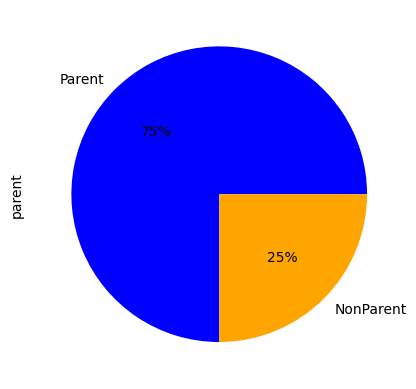

In [18]:
#6 Visualizations
parents_pie = dffinal_morethan5['parent'].value_counts().plot.pie(labels = ['Parent', 'NonParent'], autopct=('%1.f%%'), colors = ['b', 'orange'])

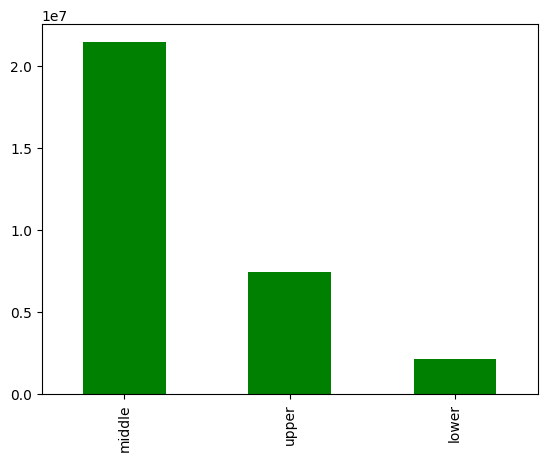

In [19]:
#income class vis
income_bar = dffinal_morethan5['economic_class'].value_counts().plot.bar(color = ['g'])

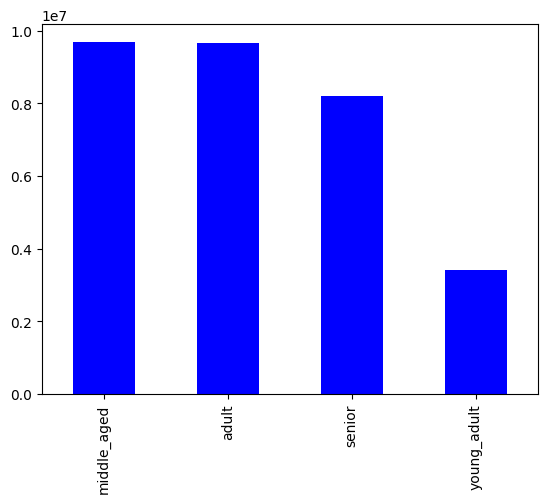

In [20]:
#age group vis
avg_age_bar = dffinal_morethan5['age_group'].value_counts().plot.bar(color = ['blue'])

In [21]:
#percents for baby, bulk good, and pet flags were nearly 0, no vis was appropriate

In [22]:
#7
#agg max, mean, min for profile level usage
#age group
#economic class
#Parents

In [23]:
#age group
dffinal_morethan5.groupby('age_group').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_group                                    
adult                    10.827255  0.0  30.0
middle_aged              10.825714  0.0  30.0
senior                   10.791788  0.0  30.0
young_adult              10.762997  0.0  30.0

In [24]:
dffinal_morethan5.groupby('age_group').agg({'avg_price': ['mean', 'min', 'max']})

avg_price                      
                  mean     min           max
age_group                                   
adult        11.722935  1.0000   6983.593023
middle_aged  12.112030  1.0000  15006.940000
senior       11.757768  1.2625  14042.512281
young_adult  12.444676  2.0000  10209.987755

In [25]:
#economic class
dffinal_morethan5.groupby('economic_class').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                                 mean  min   max
economic_class                                  
lower                       11.249689  0.0  30.0
middle                      10.789609  0.0  30.0
upper                       10.746057  0.0  30.0

In [26]:
dffinal_morethan5.groupby('economic_class').agg({'avg_price': ['mean', 'min', 'max']})

avg_price                   
                     mean  min           max
economic_class                              
lower            6.556684  1.0     11.857143
middle           8.854847  1.1   5135.893590
upper           22.388092  7.0  15006.940000

In [27]:
#parents
dffinal_morethan5.groupby('parent').agg({'days_since_prior_order': ['mean', 'min', 'max']})

days_since_prior_order           
                         mean  min   max
parent                                  
0.0                 10.791951  0.0  30.0
1.0                 10.816416  0.0  30.0

In [28]:
dffinal_morethan5.groupby('parent').agg({'avg_price': ['mean', 'min', 'max']})

avg_price                   
             mean  min           max
parent                              
0.0     12.102657  1.0  15006.940000
1.0     11.877157  1.0  10209.987755

In [29]:
#8
#compare profiles by region and departments

In [30]:
#age group by region
crosstab_region_age = pd.crosstab(dffinal_morethan5['age_group'], dffinal_morethan5['region'], dropna = False, margins = True)
crosstab_region_age

region,Midwest,Northeast,South,West,All
age_group,,,,,
adult,2279362,1679477,3242576,2462360,9663775
middle_aged,2286479,1697611,3194966,2510995,9690051
senior,1904046,1484807,2708461,2098230,8195544
young_adult,791626,602790,1165136,855642,3415194
All,7261513,5464685,10311139,7927227,30964564


In [31]:
#class by region
crosstab_region_class = pd.crosstab(dffinal_morethan5['economic_class'], dffinal_morethan5['region'], dropna = False, margins = True)
crosstab_region_class

region,Midwest,Northeast,South,West,All
economic_class,,,,,
lower,483951,374683,715512,529859,2104005
middle,5014560,3781195,7152826,5510564,21459145
upper,1763002,1308807,2442801,1886804,7401414
All,7261513,5464685,10311139,7927227,30964564


In [32]:
#parents by region
crosstab_region_parents = pd.crosstab(dffinal_morethan5['parent'], dffinal_morethan5['region'], dropna = False, margins = True)
crosstab_region_parents

region,Midwest,Northeast,South,West,All
parent,,,,,
0.0,1822816,1354482,2581933,1980450,7739681
1.0,5438697,4110203,7729206,5946777,23224883
All,7261513,5464685,10311139,7927227,30964564


In [33]:
#9 final visualizations
#multi column bar chart for class and age group



Text(0, 0.5, 'Number of Users')

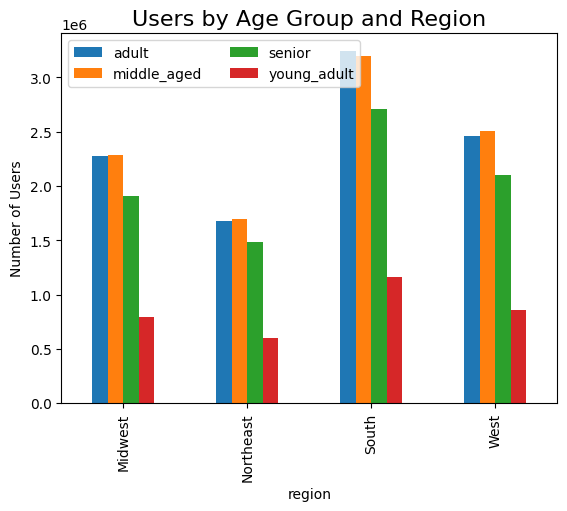

In [38]:
#crosstab without grand totals for bar chart
#barchart
crosstab_region_age_bc = pd.crosstab(dffinal_morethan5['region'], dffinal_morethan5['age_group'], dropna = False)
age_region_bar = crosstab_region_age_bc.plot(kind = 'bar')
plt.title('Users by Age Group and Region', fontsize = 16)
plt.legend(loc = 'upper left', ncol = 2)
plt.ylabel('Number of Users')

Text(0, 0.5, 'Number of Users')

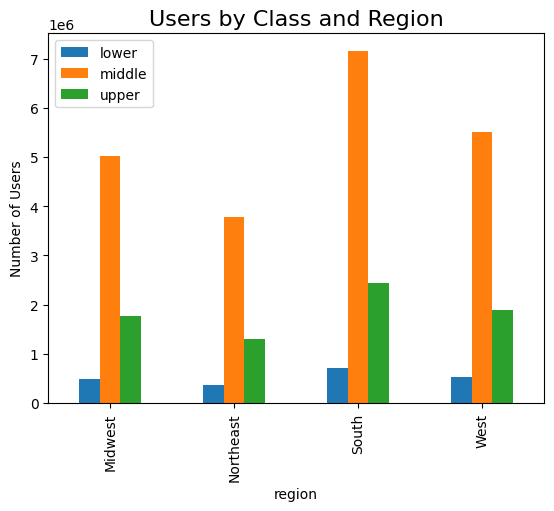

In [37]:
#crosstab without grand totals for bar chart
#barchart
crosstab_region_class_bc = pd.crosstab(dffinal_morethan5['region'], dffinal_morethan5['economic_class'], dropna = False)
class_region_bar = crosstab_region_class_bc.plot(kind = 'bar')
plt.title('Users by Class and Region', fontsize = 16)
plt.legend(loc = 'upper left', ncol = 1)
plt.ylabel('Number of Users')

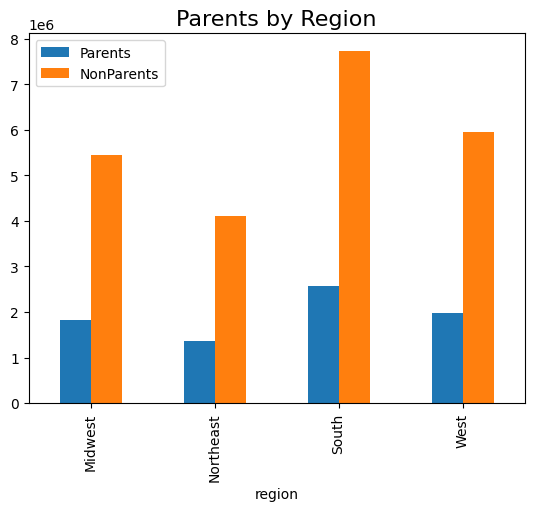

In [36]:
#crosstab without grand totals for bar chart
#barchart
crosstab_region_parent_bc = pd.crosstab(dffinal_morethan5['region'], dffinal_morethan5['parent'], dropna = False)
parents_region_bar = crosstab_region_parent_bc.plot(kind = 'bar')
plt.title('Parents by Region', fontsize = 16)
plt.legend(['Parents','NonParents'],loc = 'upper left', ncol = 1)

In [40]:
#Export charts
parents_pie.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'parents_pie.png'))
income_bar.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'income_bar.png'))
avg_age_bar.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'avg_age_bar.png'))
age_region_bar.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'age_region_bar.png'))
class_region_bar.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'class_region_bar.png'))
#parents_region_bar.figure.savefig(os.path.join(path, 'NewDataSets', '4.10 Vis', 'parents_region_bar.png'))


In [38]:
dffinal.to_pickle(os.path.join(path, 'NewDataSets', 'FinalDataFrame.pkl'))
dffinal_morethan5.to_pickle(os.path.join(path, 'NewDataSets', 'FinalDataFrame_MoreThan5Orders.pkl'))
dffinal_lessthan5.to_pickle(os.path.join(path, 'NewDataSets', 'FinalDataFrame_LessThan5Orders.pkl'))